In [1]:
#Imports
%matplotlib notebook
import latex
import pandas as pd
import numpy as np
from typing import Dict, List
from collections import OrderedDict
import datetime as datetime
from pandas.tseries.offsets import *
from IPython.core.debugger import set_trace
import matplotlib
matplotlib.style.use('seaborn-darkgrid')
#import pixiedust
#ctrl-shift-p for the command palette
pd.set_option("max_colwidth", 100)
pd.set_option("display.max_rows", 100000)
pd.set_option("display.max_columns", 1000)

In [23]:
bonds_file='../data/Options/IEF.csv'
#bonds_file='../data/Options/TLT.csv'
#bonds_file='../data/Options/SHY.csv'

bond = pd.read_csv(
    bonds_file, header=0, parse_dates=["Date"], usecols=['Date','Adj Close'])
bond.head()

Date  Adj Close
0 2002-07-30  48.837349
1 2002-07-31  49.285275
2 2002-08-01  49.488335
3 2002-08-02  49.870586
4 2002-08-05  50.121433

In [24]:
bond.rename(columns={"Adj Close": "bond"},inplace=True)

In [25]:
bond=bond[(bond.Date>='2006-02-27')]
bond.index=bond.Date
bond.drop(columns=['Date'],inplace=True)
bond.head()


bond
Date                 
2006-02-27  58.414406
2006-02-28  58.647667
2006-03-01  58.532089
2006-03-02  58.298084
2006-03-03  58.156284

In [26]:
#puts_file='../data/Options/vxxRolling_puts.csv'
puts_file = '../data/Options/vix_rolling_puts.csv'

puts = pd.read_csv(
    puts_file,
    header=0,
    parse_dates=[
        "quote_date",
        "expiration",
        "newMonth",
        "targetExpiration",
    ])
puts.head()

Date    i quote_date expiration  strike  trade_volume  price  \
0  2006-04-19  714 2006-04-19 2006-05-17    22.5           0.0   9.90   
1  2006-04-20  721 2006-04-20 2006-05-17    22.5           0.0  12.55   
2  2006-04-21  729 2006-04-21 2006-05-17    22.5           0.0  12.35   
3  2006-04-24  768 2006-04-24 2006-05-17    22.5          20.0  12.45   
4  2006-04-25  807 2006-04-25 2006-05-17    22.5           0.0   9.90   

    newMonth targetExpiration                      ExpDiff  mid_underlying  \
0 2006-04-19       2006-11-05  172 days 00:00:00.000000000           11.32   
1 2006-04-19       2006-11-05  172 days 00:00:00.000000000           11.64   
2 2006-04-19       2006-11-05  172 days 00:00:00.000000000           11.59   
3 2006-04-19       2006-11-05  172 days 00:00:00.000000000           11.75   
4 2006-04-19       2006-11-05  172 days 00:00:00.000000000           11.76   

   futures  strikeTarget  strikeLocation  StrikeDiff  entry   exit  
0     22.5         11.32             714       11.18  False  False  
1     12.5         11.32             714       11.18  False  False  
2     12.5         11.32             714       11.18  False  False  
3     12.5         11.32             714       11.18  False  False  
4     12.5         11.32             714       11.18  False  False

In [27]:
filter1=puts['entry'].isin([False]) 
filter2=puts['exit'].isin([False]) 
dealing_days=puts[(filter1)| (filter2)]

dealing_days.to_csv('../data/Options/strikes.csv')
dealing_days.head()

Date    i quote_date expiration  strike  trade_volume  price  \
0  2006-04-19  714 2006-04-19 2006-05-17    22.5           0.0   9.90   
1  2006-04-20  721 2006-04-20 2006-05-17    22.5           0.0  12.55   
2  2006-04-21  729 2006-04-21 2006-05-17    22.5           0.0  12.35   
3  2006-04-24  768 2006-04-24 2006-05-17    22.5          20.0  12.45   
4  2006-04-25  807 2006-04-25 2006-05-17    22.5           0.0   9.90   

    newMonth targetExpiration                      ExpDiff  mid_underlying  \
0 2006-04-19       2006-11-05  172 days 00:00:00.000000000           11.32   
1 2006-04-19       2006-11-05  172 days 00:00:00.000000000           11.64   
2 2006-04-19       2006-11-05  172 days 00:00:00.000000000           11.59   
3 2006-04-19       2006-11-05  172 days 00:00:00.000000000           11.75   
4 2006-04-19       2006-11-05  172 days 00:00:00.000000000           11.76   

   futures  strikeTarget  strikeLocation  StrikeDiff  entry   exit  
0     22.5         11.32             714       11.18  False  False  
1     12.5         11.32             714       11.18  False  False  
2     12.5         11.32             714       11.18  False  False  
3     12.5         11.32             714       11.18  False  False  
4     12.5         11.32             714       11.18  False  False

In [28]:
#calls_file='../data/Options/vxxRolling_calls.csv'
calls_file='../data/Options/vix_rolling_calls.csv'

calls = pd.read_csv(
    calls_file,
    header=0,
    parse_dates=[
        "quote_date",
        "expiration",
        "newMonth",
        "targetExpiration",
    ])
calls.head()

Date    i quote_date expiration  strike  trade_volume  price  \
0  2006-04-19  714 2006-04-19 2006-05-17    22.5           0.0  0.075   
1  2006-04-20  721 2006-04-20 2006-05-17    22.5           0.0  0.075   
2  2006-04-21  729 2006-04-21 2006-05-17    22.5           0.0  0.075   
3  2006-04-24  768 2006-04-24 2006-05-17    22.5           0.0  0.075   
4  2006-04-25  807 2006-04-25 2006-05-17    22.5           0.0  0.050   

    newMonth targetExpiration                      ExpDiff  mid_underlying  \
0 2006-04-19       2006-11-05  172 days 00:00:00.000000000           11.32   
1 2006-04-19       2006-11-05  172 days 00:00:00.000000000           11.64   
2 2006-04-19       2006-11-05  172 days 00:00:00.000000000           11.59   
3 2006-04-19       2006-11-05  172 days 00:00:00.000000000           11.75   
4 2006-04-19       2006-11-05  172 days 00:00:00.000000000           11.76   

   futures  strikeTarget  strikeLocation  StrikeDiff  entry   exit  
0     22.5         22.64             714        0.14  False  False  
1     12.5         22.64             714        0.14  False  False  
2     12.5         22.64             714        0.14  False  False  
3     12.5         22.64             714        0.14  False  False  
4     12.5         22.64             714        0.14  False  False

In [29]:
put_prices = puts.filter(
    [
        'quote_date', 'expiration', 'strike', 'trade_volume', 'price',
        'targetExpiration', 'ExpDiff', 'mid_underlying','futures','entry', 'exit'
    ],
    axis=1)
put_prices.rename(
    columns={
        'quote_date': 'put_quote_date',
        'expiration': 'put_expiration',
        'strike': 'put_strike',
        'trade_volume': 'put_trade_volume',
        'price': 'put_price',
        'targetExpiration': 'put_targetExpiration',
        'ExpDiff': 'put_ExpDiff',
        'mid_underlying': 'put_mid_underlying',
        'futures':'futures',
        'entry': 'put_entry',
        'exit': 'put_exit'
    },
    inplace=True)
put_prices.index = put_prices.put_quote_date
put_prices.head()

put_quote_date put_expiration  put_strike  put_trade_volume  \
put_quote_date                                                               
2006-04-19         2006-04-19     2006-05-17        22.5               0.0   
2006-04-20         2006-04-20     2006-05-17        22.5               0.0   
2006-04-21         2006-04-21     2006-05-17        22.5               0.0   
2006-04-24         2006-04-24     2006-05-17        22.5              20.0   
2006-04-25         2006-04-25     2006-05-17        22.5               0.0   

                put_price put_targetExpiration                  put_ExpDiff  \
put_quote_date                                                                
2006-04-19           9.90           2006-11-05  172 days 00:00:00.000000000   
2006-04-20          12.55           2006-11-05  172 days 00:00:00.000000000   
2006-04-21          12.35           2006-11-05  172 days 00:00:00.000000000   
2006-04-24          12.45           2006-11-05  172 days 00:00:00.000000000   
2006-04-25           9.90           2006-11-05  172 days 00:00:00.000000000   

                put_mid_underlying  futures  put_entry put_exit  
put_quote_date                                                   
2006-04-19                   11.32     22.5      False    False  
2006-04-20                   11.64     12.5      False    False  
2006-04-21                   11.59     12.5      False    False  
2006-04-24                   11.75     12.5      False    False  
2006-04-25                   11.76     12.5      False    False

In [30]:
call_prices = calls.filter(
    [
        'quote_date', 'expiration', 'strike', 'trade_volume', 'price',
        'targetExpiration', 'ExpDiff', 'mid_underlying', 'futures','entry', 'exit'
    ],
    axis=1)
call_prices.rename(
    columns={
        'quote_date': 'call_quote_date',
        'expiration': 'call_expiration',
        'strike': 'call_strike',
        'trade_volume': 'call_trade_volume',
        'price': 'call_price',
        'targetExpiration': 'call_targetExpiration',
        'ExpDiff': 'call_ExpDiff',
        'mid_underlying': 'call_mid_underlying',
        'futures': 'futures',
        'entry': 'call_entry',
        'exit': 'call_exit'
    },
    inplace=True)
call_prices.index = call_prices.call_quote_date
call_prices.head()

call_quote_date call_expiration  call_strike  \
call_quote_date                                                
2006-04-19           2006-04-19      2006-05-17         22.5   
2006-04-20           2006-04-20      2006-05-17         22.5   
2006-04-21           2006-04-21      2006-05-17         22.5   
2006-04-24           2006-04-24      2006-05-17         22.5   
2006-04-25           2006-04-25      2006-05-17         22.5   

                 call_trade_volume  call_price call_targetExpiration  \
call_quote_date                                                        
2006-04-19                     0.0       0.075            2006-11-05   
2006-04-20                     0.0       0.075            2006-11-05   
2006-04-21                     0.0       0.075            2006-11-05   
2006-04-24                     0.0       0.075            2006-11-05   
2006-04-25                     0.0       0.050            2006-11-05   

                                call_ExpDiff  call_mid_underlying  futures  \
call_quote_date                                                              
2006-04-19       172 days 00:00:00.000000000                11.32     22.5   
2006-04-20       172 days 00:00:00.000000000                11.64     12.5   
2006-04-21       172 days 00:00:00.000000000                11.59     12.5   
2006-04-24       172 days 00:00:00.000000000                11.75     12.5   
2006-04-25       172 days 00:00:00.000000000                11.76     12.5   

                 call_entry call_exit  
call_quote_date                        
2006-04-19            False     False  
2006-04-20            False     False  
2006-04-21            False     False  
2006-04-24            False     False  
2006-04-25            False     False

In [31]:
combined = pd.concat([put_prices, call_prices,bond], axis=1, sort=False)
combined.to_csv('../data/Options/combined1.csv')
combined.head() #.fillna(method='ffill',inplace=True)


put_quote_date put_expiration  put_strike  put_trade_volume  \
2006-02-27            NaT            NaT         NaN               NaN   
2006-02-28            NaT            NaT         NaN               NaN   
2006-03-01            NaT            NaT         NaN               NaN   
2006-03-02            NaT            NaT         NaN               NaN   
2006-03-03            NaT            NaT         NaN               NaN   

            put_price put_targetExpiration put_ExpDiff  put_mid_underlying  \
2006-02-27        NaN                  NaT         NaN                 NaN   
2006-02-28        NaN                  NaT         NaN                 NaN   
2006-03-01        NaN                  NaT         NaN                 NaN   
2006-03-02        NaN                  NaT         NaN                 NaN   
2006-03-03        NaN                  NaT         NaN                 NaN   

            futures put_entry put_exit call_quote_date call_expiration  \
2006-02-27      NaN       NaN      NaN             NaT             NaT   
2006-02-28      NaN       NaN      NaN             NaT             NaT   
2006-03-01      NaN       NaN      NaN             NaT             NaT   
2006-03-02      NaN       NaN      NaN             NaT             NaT   
2006-03-03      NaN       NaN      NaN             NaT             NaT   

            call_strike  call_trade_volume  call_price call_targetExpiration  \
2006-02-27          NaN                NaN         NaN                   NaT   
2006-02-28          NaN                NaN         NaN                   NaT   
2006-03-01          NaN                NaN         NaN                   NaT   
2006-03-02          NaN                NaN         NaN                   NaT   
2006-03-03          NaN                NaN         NaN                   NaT   

           call_ExpDiff  call_mid_underlying  futures call_entry call_exit  \
2006-02-27          NaN                  NaN      NaN        NaN       NaN   
2006-02-28          NaN                  NaN      NaN        NaN       NaN   
2006-03-01          NaN                  NaN      NaN        NaN       NaN   
2006-03-02          NaN                  NaN      NaN        NaN       NaN   
2006-03-03          NaN                  NaN      NaN        NaN       NaN   

                 bond  
2006-02-27  58.414406  
2006-02-28  58.647667  
2006-03-01  58.532089  
2006-03-02  58.298084  
2006-03-03  58.156284

In [32]:
combined.fillna(method='ffill',inplace=True)
#combined

In [33]:
mask = combined['call_price'].isnull()
#print(combined.loc[mask].tail())

In [34]:
mask = combined['put_price'].isnull()
#print(combined.loc[mask].tail())

In [35]:
combined.to_csv('../data/Options/combined2.csv')
combined.tail()

put_quote_date put_expiration  put_strike  put_trade_volume  \
2018-09-17     2018-09-05     2019-01-16        12.0               0.0   
2018-09-18     2018-09-05     2019-01-16        12.0               0.0   
2018-09-19     2018-09-05     2019-01-16        12.0               0.0   
2018-09-20     2018-09-05     2019-01-16        12.0               0.0   
2018-09-21     2018-09-05     2019-01-16        12.0               0.0   

            put_price put_targetExpiration                 put_ExpDiff  \
2018-09-17        0.3           2019-03-10  53 days 00:00:00.000000000   
2018-09-18        0.3           2019-03-10  53 days 00:00:00.000000000   
2018-09-19        0.3           2019-03-10  53 days 00:00:00.000000000   
2018-09-20        0.3           2019-03-10  53 days 00:00:00.000000000   
2018-09-21        0.3           2019-03-10  53 days 00:00:00.000000000   

            put_mid_underlying  futures put_entry put_exit call_quote_date  \
2018-09-17               13.91     16.0     False    False      2018-09-05   
2018-09-18               13.91     16.0     False    False      2018-09-05   
2018-09-19               13.91     16.0     False    False      2018-09-05   
2018-09-20               13.91     16.0     False    False      2018-09-05   
2018-09-21               13.91     16.0     False    False      2018-09-05   

           call_expiration  call_strike  call_trade_volume  call_price  \
2018-09-17      2019-01-16         24.0                0.0         1.3   
2018-09-18      2019-01-16         24.0                0.0         1.3   
2018-09-19      2019-01-16         24.0                0.0         1.3   
2018-09-20      2019-01-16         24.0                0.0         1.3   
2018-09-21      2019-01-16         24.0                0.0         1.3   

           call_targetExpiration                call_ExpDiff  \
2018-09-17            2019-03-10  53 days 00:00:00.000000000   
2018-09-18            2019-03-10  53 days 00:00:00.000000000   
2018-09-19            2019-03-10  53 days 00:00:00.000000000   
2018-09-20            2019-03-10  53 days 00:00:00.000000000   
2018-09-21            2019-03-10  53 days 00:00:00.000000000   

            call_mid_underlying  futures call_entry call_exit        bond  
2018-09-17                13.91     16.0      False     False  101.540001  
2018-09-18                13.91     16.0      False     False  101.120003  
2018-09-19                13.91     16.0      False     False  100.949997  
2018-09-20                13.91     16.0      False     False  100.959999  
2018-09-21                13.91     16.0      False     False  101.000000

In [84]:
#%%pixie_debugger
starting_capital = 100000.00
put_allocation = 0.14
call_allocation = 0.06
bond_allocation = 0.80
put_position = 0
put_position_value = 0
call_position = 0
call_position_value = 0
bond_position = 0
bond_position_value = 0
cash = 0.00
equity_curve = 0
new_cash = 0.00
temp_PnL = {}

for i, row in enumerate(combined.itertuples(), 0):
    if i == 0: start = False
    if i == 0: equity_curve = starting_capital

    if (row.put_entry == True and row.call_entry == True and row.put_price > 0
            and row.call_price > 0):
        #if (combined.put_expiration[i]!=combined.put_expiration[i-1]):
        start = True
        if row.put_mid_underlying > 40:
            put_allocation = 0.14
            call_allocation = 0.00
            bond_allocation = 0.86
        elif row.put_mid_underlying < 8:
            put_allocation = 0.00
            call_allocation = 0.06
            bond_allocation = 0.94
        else:
            put_allocation = 0.00
            call_allocation = 0.00
            bond_allocation = 1

        put_position = round((equity_curve * put_allocation) / row.put_price,
                             0)
        put_position_value = put_position * row.put_price

        call_position = round(
            (equity_curve * call_allocation) / row.call_price, 0)
        call_position_value = call_position * row.call_price

        bond_position = round((equity_curve * bond_allocation) / row.bond, 0)
        bond_position_value = bond_position * row.bond

        cash = equity_curve - (
            put_position_value + call_position_value + bond_position_value)
        equity_curve = put_position_value + call_position_value + bond_position_value + cash

        temp_PnL[combined.index[i]] = [
            i, row.put_quote_date, row.put_expiration, row.put_strike,
            row.put_trade_volume, row.put_price, row.put_targetExpiration,
            row.put_ExpDiff, row.put_mid_underlying, put_position,
            put_position_value, row.put_entry, row.put_exit, row.futures,
            row.call_quote_date, row.call_expiration, row.call_strike,
            row.call_trade_volume, row.call_price, row.call_targetExpiration,
            row.call_ExpDiff, row.call_mid_underlying, call_position,
            call_position_value, row.call_entry, row.call_exit, bond_position,
            bond_position_value, cash, equity_curve
        ]
        #print(i, row.price, 'position', position, 'position_value',
        #position_value, 'cash', cash, 'equity_curve', equity_curve)
    if start == True:
        if row.put_entry == False and row.call_entry == False and row.put_price > 0 and row.call_price > 0:
            put_position_value = put_position * row.put_price
            call_position_value = call_position * row.call_price
            bond_position_value = bond_position * row.bond
            equity_curve = put_position_value + call_position_value + bond_position_value + cash
            temp_PnL[combined.index[i]] = [
                i, row.put_quote_date, row.put_expiration, row.put_strike,
                row.put_trade_volume, row.put_price, row.put_targetExpiration,
                row.put_ExpDiff, row.put_mid_underlying, put_position,
                put_position_value, row.put_entry, row.put_exit, row.futures,
                row.call_quote_date, row.call_expiration, row.call_strike,
                row.call_trade_volume, row.call_price,
                row.call_targetExpiration, row.call_ExpDiff,
                row.call_mid_underlying, call_position, call_position_value,
                row.call_entry, row.call_exit, bond_position,
                bond_position_value, cash, equity_curve
            ]

In [85]:
PL = pd.DataFrame(temp_PnL).T.fillna(method='ffill')
PL.index.name = 'Date'
PL.columns = [
    'i', 'put_quote_date', 'put_expiration', 'put_strike', 'put_trade_volume',
    'put_price', 'put_targetExpiration', 'put_ExpDiff', 'put_mid_underlying',
    'put_position', 'put_position_value', 'put_entry', 'put_exit','futures',
    'call_quote_date', 'call_expiration', 'call_strike', 'call_trade_volume',
    'call_price', 'call_targetExpiration', 'call_ExpDiff',
    'call_mid_underlying', 'call_position', 'call_position_value',
    'call_entry', 'call_exit', 'bond_position', 'bond_position_value', 'cash',
    'equity_curve'
]

PL.to_csv('../data/Options/vxxPnL.csv')
PL.tail()

i put_quote_date put_expiration  put_strike  put_trade_volume  \
Date                                                                           
2018-09-17  3161     2018-09-05     2019-01-16        12.0               0.0   
2018-09-18  3162     2018-09-05     2019-01-16        12.0               0.0   
2018-09-19  3163     2018-09-05     2019-01-16        12.0               0.0   
2018-09-20  3164     2018-09-05     2019-01-16        12.0               0.0   
2018-09-21  3165     2018-09-05     2019-01-16        12.0               0.0   

            put_price put_targetExpiration                 put_ExpDiff  \
Date                                                                     
2018-09-17        0.3           2019-03-10  53 days 00:00:00.000000000   
2018-09-18        0.3           2019-03-10  53 days 00:00:00.000000000   
2018-09-19        0.3           2019-03-10  53 days 00:00:00.000000000   
2018-09-20        0.3           2019-03-10  53 days 00:00:00.000000000   
2018-09-21        0.3           2019-03-10  53 days 00:00:00.000000000   

            put_mid_underlying  put_position  put_position_value  put_entry  \
Date                                                                          
2018-09-17               13.91      362530.0            108759.0      False   
2018-09-18               13.91      362530.0            108759.0      False   
2018-09-19               13.91      362530.0            108759.0      False   
2018-09-20               13.91      362530.0            108759.0      False   
2018-09-21               13.91      362530.0            108759.0      False   

            put_exit  futures call_quote_date call_expiration  call_strike  \
Date                                                                         
2018-09-17     False     16.0      2018-09-05      2019-01-16         24.0   
2018-09-18     False     16.0      2018-09-05      2019-01-16         24.0   
2018-09-19     False     16.0      2018-09-05      2019-01-16         24.0   
2018-09-20     False     16.0      2018-09-05      2019-01-16         24.0   
2018-09-21     False     16.0      2018-09-05      2019-01-16         24.0   

            call_trade_volume  call_price call_targetExpiration  \
Date                                                              
2018-09-17                0.0         1.3            2019-03-10   
2018-09-18                0.0         1.3            2019-03-10   
2018-09-19                0.0         1.3            2019-03-10   
2018-09-20                0.0         1.3            2019-03-10   
2018-09-21                0.0         1.3            2019-03-10   

                          call_ExpDiff  call_mid_underlying  call_position  \
Date                                                                         
2018-09-17  53 days 00:00:00.000000000                13.91            0.0   
2018-09-18  53 days 00:00:00.000000000                13.91            0.0   
2018-09-19  53 days 00:00:00.000000000                13.91            0.0   
2018-09-20  53 days 00:00:00.000000000                13.91            0.0   
2018-09-21  53 days 00:00:00.000000000                13.91            0.0   

            call_position_value  call_entry  call_exit  bond_position  \
Date                                                                    
2018-09-17                  0.0       False      False         9459.0   
2018-09-18                  0.0       False      False         9459.0   
2018-09-19                  0.0       False      False         9459.0   
2018-09-20                  0.0       False      False         9459.0   
2018-09-21                  0.0       False      False         9459.0   

            bond_position_value           cash   equity_curve  
Date                                                           
2018-09-17        960466.869459 -135979.288587  933246.580872  
2018-09-18        956494.108377 -135979.288587  929273.819790  
2018-09-19        954886.021623 -135979.288587  9

In [86]:
#because the is_list_like is moved to pandas.api.types
pd.core.common.is_list_like = pd.api.types.is_list_like
import ffn

In [87]:
option_series=PL[['equity_curve']].copy()
option_series.head()
#new = old[['A', 'C', 'D']].copy()

equity_curve
Date                    
2006-05-17      100000.0
2006-05-18      100000.0
2006-05-19      100000.0
2006-05-22      100000.0
2006-05-23      100000.0

In [88]:
option_series.rename(columns={'equity_curve': 'Options'}, inplace=True)
option_series.head()

Options
Date                
2006-05-17  100000.0
2006-05-18  100000.0
2006-05-19  100000.0
2006-05-22  100000.0
2006-05-23  100000.0

<IPython.core.display.Javascript object>


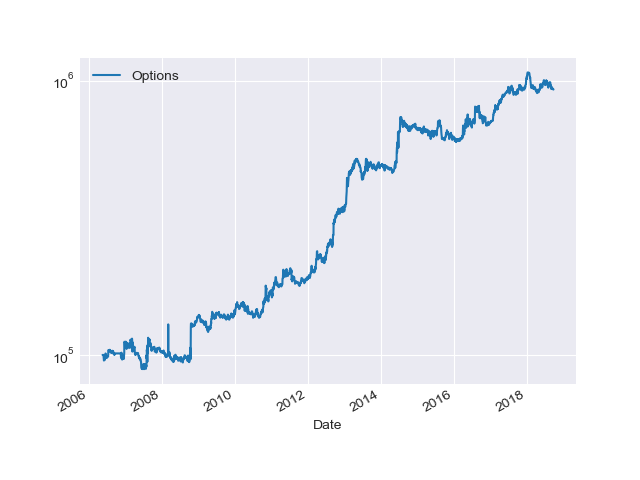

In [89]:
#option_series=option_series[(option_series.index< '2009-01-01') & (option_series.index> '2008-09-01')]
#option_series=option_series[(option_series.index>'2016-01-01')]
ax = option_series.plot(logy=True)

<IPython.core.display.Javascript object>


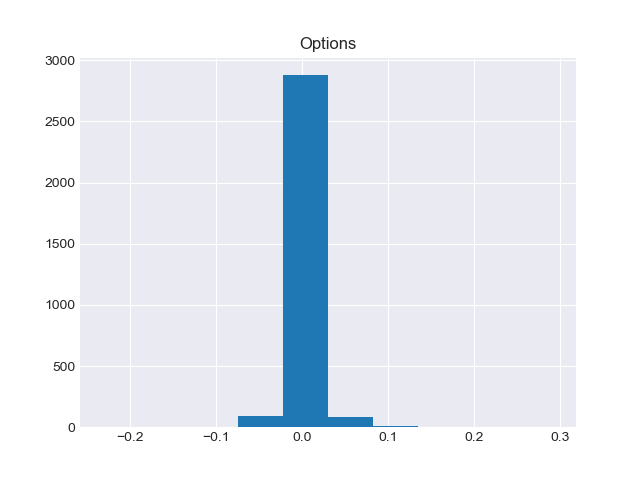

In [90]:
returns = option_series.to_returns().dropna()
ax = returns.hist()

In [91]:
stats = option_series.calc_stats()
stats.display()

Stat                 Options
-------------------  ----------
Start                2006-05-17
End                  2018-09-21
Risk-free rate       0.00%

Total Return         828.14%
Daily Sharpe         0.83
Daily Sortino        1.50
CAGR                 19.77%
Max Drawdown         -27.39%
Calmar Ratio         0.72

MTD                  -2.35%
3m                   -6.48%
6m                   -1.22%
YTD                  -8.70%
1Y                   3.25%
3Y (ann.)            14.66%
5Y (ann.)            13.57%
10Y (ann.)           25.61%
Since Incep. (ann.)  19.77%

Daily Sharpe         0.83
Daily Sortino        1.50
Daily Mean (ann.)    21.64%
Daily Vol (ann.)     26.02%
Daily Skew           2.04
Daily Kurt           56.50
Best Day             29.25%
Worst Day            -23.18%

Monthly Sharpe       0.91
Monthly Sortino      2.91
Monthly Mean (ann.)  21.87%
Monthly Vol (ann.)   24.12%
Monthly Skew         1.87
Monthly Kurt         5.21
Best Month           34.48%
Worst Month          -1